## **Flight Price Prediction Using Random Forest Regressor**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_train = pd.read_excel('https://github.com/FadlyHaikal/FlightDataset/blob/main/Data_Train.xlsx?raw=true')
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [143]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [144]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [145]:
#Data Clean
data_train.dropna(inplace=True)

**EDA(Exploratory Data Analysis)**

In [146]:
data_train['Journey_day'] = pd.to_datetime(data_train.Date_of_Journey,format = "%d/%m/%Y").dt.day
data_train['Journey_month'] = pd.to_datetime(data_train.Date_of_Journey,format = "%d/%m/%Y").dt.month
data_train=data_train.drop(['Date_of_Journey'], axis=1)

In [147]:
data_train['Dep_hour'] = pd.to_datetime(data_train.Dep_Time).dt.hour
data_train['Dep_min'] = pd.to_datetime(data_train.Dep_Time).dt.minute
data_train.drop(['Dep_Time'],axis = 1,inplace = True)

In [148]:
data_train['Arrival_hour'] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train['Arrival_minute'] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train.drop(['Arrival_Time'],axis=1,inplace =True)

In [149]:
duration = list(data_train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
data_train['Duration_hours'] = duration_hours
data_train['Duration_mins'] = duration_mins
data_train.drop(['Duration'],axis=1,inplace= True)

In [150]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,21,4,45


In [151]:
data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

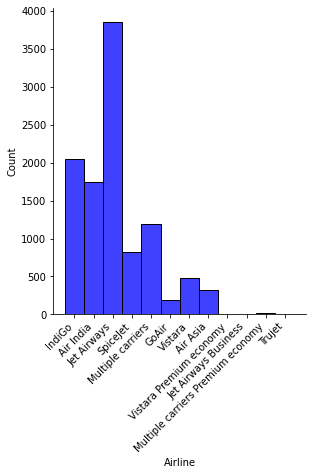

In [152]:
sns.displot(data = data_train, x = data_train['Airline'], color='blue')
plt.xticks(rotation=45, horizontalalignment='right')

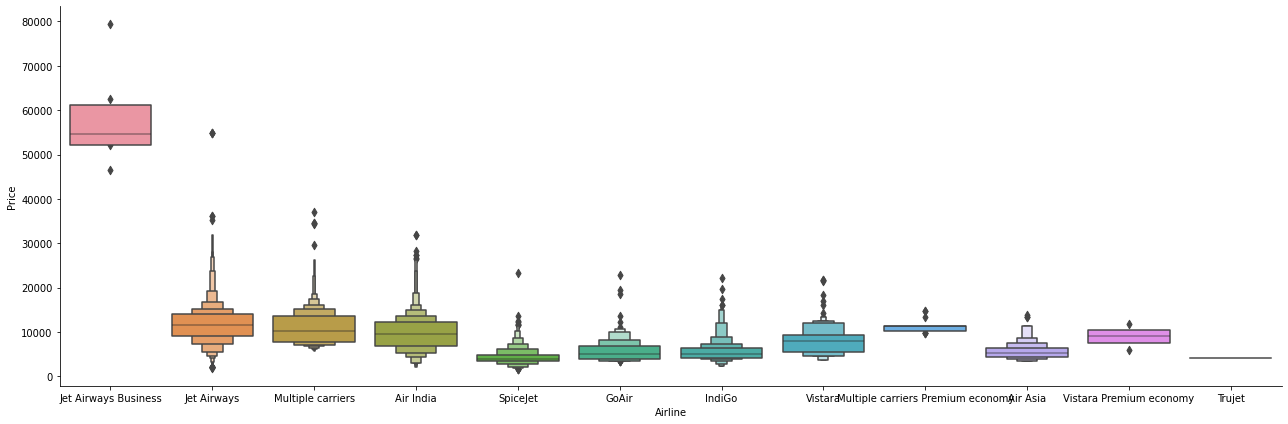

In [153]:
sns.catplot(x = 'Airline', y = 'Price', data = data_train.sort_values("Price",ascending = False),kind = 'boxen',height=6,aspect=3)
plt.show()

In [154]:
Airline = data_train[['Airline']]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [155]:
data_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

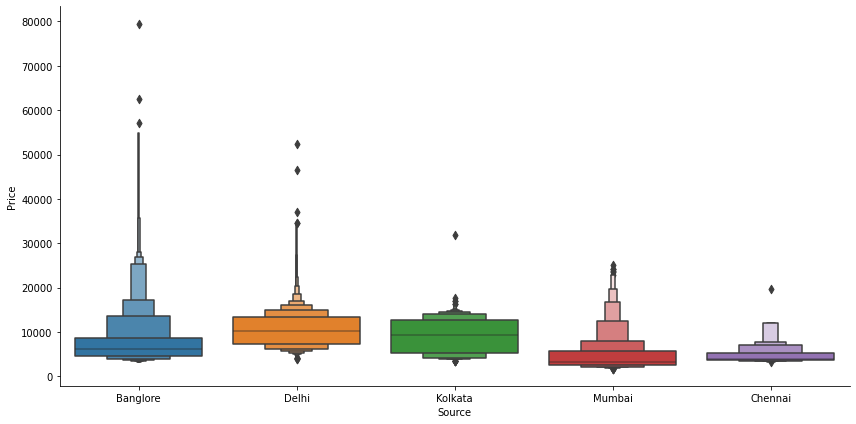

In [156]:
sns.catplot(x = 'Source', y = 'Price', data = data_train.sort_values("Price",ascending = False),kind = 'boxen',height=6,aspect=2)
plt.show()

In [157]:
Source = data_train[['Source']]
Source = pd.get_dummies(Source)
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [158]:
data_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [159]:
Destination = data_train[['Destination']]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [160]:
# dropping route columns because route and total stops are the same
data_train.drop(['Route',"Additional_Info"],axis = 1,inplace = True)

In [161]:
data_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

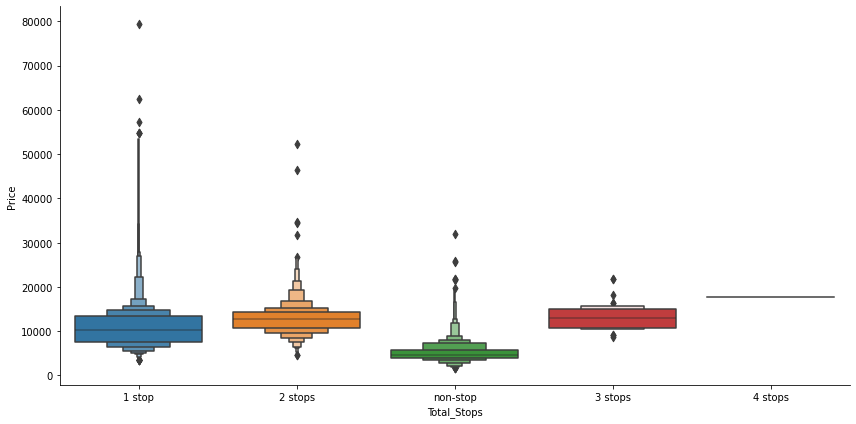

In [162]:
sns.catplot(x = 'Total_Stops', y = 'Price', data = data_train.sort_values("Price",ascending = False),kind = 'boxen',height=6,aspect=2)
plt.show()

In [163]:
# stops is an ordinal column so we will assign an order
data_train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace = True)

In [164]:
training = pd.concat([data_train,Airline,Source,Destination],axis = 1)

In [165]:
# dropping airline, source and destination column because we made a dummies column before
training.drop(['Airline','Source','Destination'],axis = 1,inplace = True)

In [166]:
X = training.drop(columns=['Price'])
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,1,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,13,7,25,0,...,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,4,19,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,23,5,25,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,21,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [167]:
y = training['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Selection

**ExtraTreesRegressor**

In [169]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [181]:
print(selection.feature_importances_)

[2.34470845e-01 1.44418513e-01 5.46094177e-02 2.35014753e-02
 2.25473292e-02 2.15925807e-02 2.07199719e-02 1.09405146e-01
 2.02110603e-02 2.16983860e-03 8.58002568e-03 1.74970086e-03
 1.95638144e-02 1.39356316e-01 6.76527012e-02 1.85249606e-02
 7.97416495e-04 3.07385916e-03 1.25888933e-04 4.44282846e-03
 6.39958286e-05 8.58514830e-03 4.37313106e-04 1.30252307e-02
 2.17814721e-03 6.85664184e-03 2.01771515e-03 9.40415291e-03
 1.54439293e-02 7.06753973e-03 3.47696351e-04 1.70588009e-02]


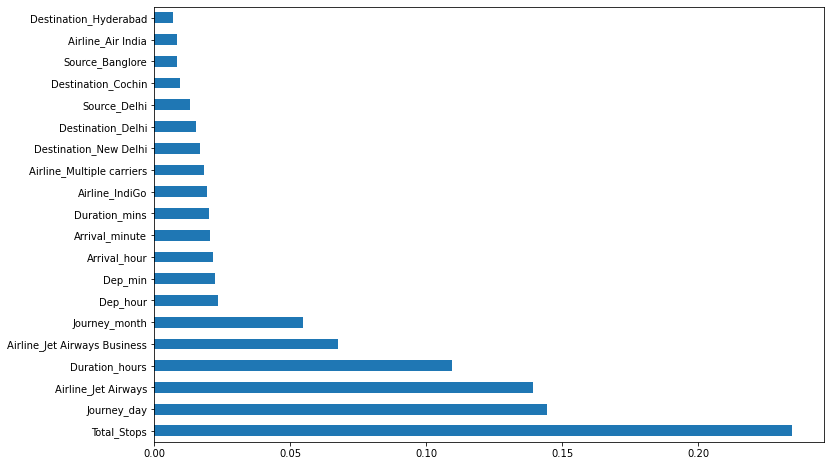

In [170]:
# After use feature importance, we show it with plot
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Heatmap**

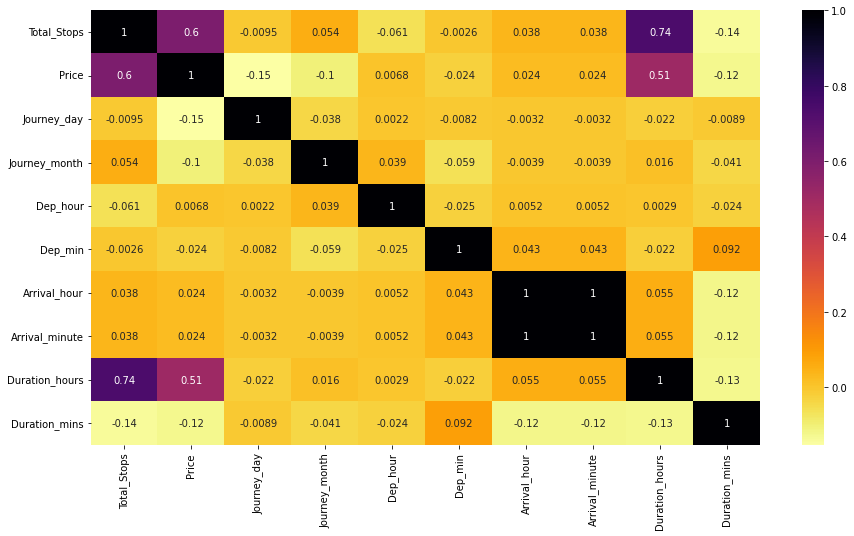

In [171]:
plt.figure(figsize = (15,8))
sns.heatmap(data_train.corr(),annot = True,cmap = "inferno_r")
plt.show()

## Modeling

**Using RandomForestRegressor**

In [172]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
model = reg_rf.fit(X_train,y_train)

In [173]:
reg_rf.score(X_train,y_train)

0.9524399055040813

In [174]:
reg_rf.score(X_test,y_test)

0.7952056601955398

In [175]:
y_pred_rf = reg_rf.predict(X_test)
y_pred_rf

array([16842.31      ,  5428.04      ,  8893.06      , ...,
        6638.22      , 12662.61      , 12909.24114286])

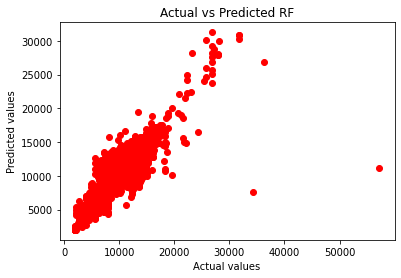

In [176]:
plt.scatter(y_test, y_pred_rf, color='red')
plt.title("Actual vs Predicted RF")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [177]:
from sklearn import metrics
def evaluate_metrics(y_true,y_pred):
    mean_abs_error = metrics.mean_absolute_error(y_true,y_pred)
    mean_sq_error = metrics.mean_squared_error(y_true,y_pred)
    root_mean_sq_error = metrics.mean_squared_error(y_true,y_pred)
    r2_scr = metrics.r2_score(y_true,y_pred)
    median_abs_score = metrics.median_absolute_error(y_true,y_pred)
    explained_variance = metrics.explained_variance_score(y_true,y_pred)
    return mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance
mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(y_test, y_pred_rf)
scr = reg_rf.score(X_test,y_test)
print("METRICS  :\n\nMean Absolute Error (MAE)      :  ",mean_abs_error,
      "\nScore                          :   ",scr,
      "\nMean Squared Error (MSE)       :  ",mean_sq_error,
      "\nRoot Mean Squared Error (RMSE) :  ",root_mean_sq_error,
      "\nR2 Square                      :  ",r2_scr,
      "\nMedian Absolute Score          :  ",median_abs_score,
      "\nExplained Variance Score       :  ",explained_variance)

METRICS  :

Mean Absolute Error (MAE)      :   1184.0030431254909 
Score                          :    0.7952056601955398 
Mean Squared Error (MSE)       :   4415787.089733297 
Root Mean Squared Error (RMSE) :   4415787.089733297 
R2 Square                      :   0.7952056601955398 
Median Absolute Score          :   644.3199999999997 
Explained Variance Score       :   0.7955609268544269


## Test Model

In [178]:
!pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [179]:
print(X_test.columns)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_mins',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')


In [180]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import joblib

joblib.dump(model, 'prediction-model.joblib')

['prediction-model.joblib']